In [18]:
import matplotlib.pyplot as plt
import numpy as np
from utils import read_points
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


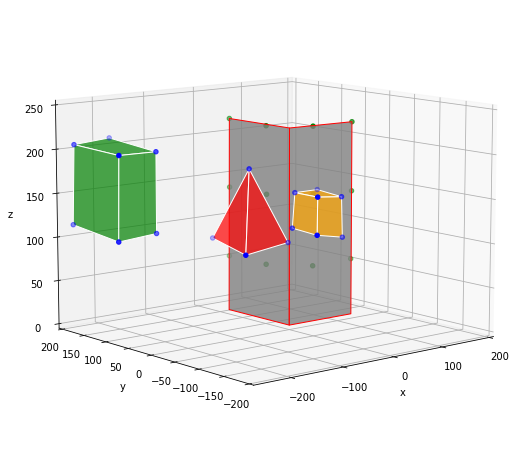

In [19]:
scene_points = read_points('outputs/estimated_points3D_test.txt')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-260, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(0, 250)

ax.azim = -130
ax.dist = 9
ax.elev = 10

planes = scene_points[:12]
new_points = np.vstack(([0, 0, 0], [0, 0, 225]))
new_points = np.vstack((new_points, np.vstack(([129, 0, 0], [0, 130, 0]))))
planes = np.vstack((planes, new_points))

parall = scene_points[12:19]

pyramid = scene_points[19:23]

cube = scene_points[23:]


planes_verts = [
                [planes[14], planes[5], planes[13], planes[12]],
                [planes[15], planes[10],  planes[13],planes[12]],
                ]
# plot sides
ax.add_collection3d(Poly3DCollection(planes_verts,
    facecolors = 'gray', linewidths = 1, edgecolors = 'r', alpha = .8))


parall_verts = [
                [parall[0], parall[1], parall[2], parall[3]],
                [parall[0], parall[3], parall[5], parall[4]],
                [parall[3], parall[2], parall[6], parall[5]],

                ]
# plot sides
ax.add_collection3d(Poly3DCollection(parall_verts,
    facecolors = 'green', linewidths = 1, edgecolors = 'white', alpha = 0.7))


pyramid_verts = [
                    [pyramid[0], pyramid[3], pyramid[1]],
                    [pyramid[2], pyramid[3], pyramid[1]],
                    ]
# plot sides
ax.add_collection3d(Poly3DCollection(pyramid_verts,
    facecolors = 'red', linewidths = 1, edgecolors = 'w', alpha = .7))


cube_verts = [
                    [cube[0], cube[1], cube[2], cube[3]],
                    [cube[0], cube[3], cube[5], cube[4]],
                    [cube[3], cube[2], cube[6], cube[5]],
                    ]
# plot sides
ax.add_collection3d(Poly3DCollection(cube_verts,
    facecolors = 'orange', linewidths = 1, edgecolors = 'w', alpha = .7))


ax.scatter3D( planes[:12 , 0], planes[:12 , 1], planes[:12 , 2], s=20, c='green')
ax.scatter3D( parall[:, 0], parall[:, 1], parall[:, 2], s=20, c='blue')
ax.scatter3D( pyramid[:, 0], pyramid[:, 1], pyramid[:, 2], s=20, c='blue')
ax.scatter3D( cube[:, 0], cube[:, 1], cube[:, 2], s=20, c='blue')


plt.show()
fig.savefig('outputs/3Dscene.jpg')
